In [1]:
import umap
import pandas as pd
import torch
from models.encoder import AutoEncoderCnn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


c:\Users\MarvinLob\anaconda3\envs\ml4h\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load encoder

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoEncoderCnn()
model.load_state_dict(torch.load('models/encoder_model.pth'))
model.to(device)

AutoEncoderCnn(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (conv3): Conv1d(128, 256, kernel_size=(3,), stride=(1,))
  (fc1): Linear(in_features=5376, out_features=128, bias=True)
  (encoder): Sequential(
    (0): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv1d(128, 256, kernel_size=(3,), stride=(1,))
    (7): ReLU()
    (8): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=5376, out_features=128, bias=True)
  )
  (deconv1): Conv1d(1, 20, kernel_size=(4,), stride=(1,))
  (deconv2): Conv1d(20, 20, kernel_size=(4,), stride=(1,))
  (deconv3): Conv1d(20, 1, ke

## Create ptb embeddings

In [14]:
# load ptb data
ptb_train = pd.read_csv('data/ptbdb_train.csv', header=None)
ptb_test = pd.read_csv('data/ptbdb_test.csv', header=None)

ptb_train = ptb_train.drop(187, axis=1).values
ptb_test = ptb_test.drop(187, axis=1).values

#prepare for cnn
ptb_train = torch.tensor(ptb_train).float().to(device).unsqueeze(1)
ptb_test = torch.tensor(ptb_test).float().to(device).unsqueeze(1)

# get embeddings
model.eval()
with torch.no_grad():
    train_embeddings = model.encoder(ptb_train).cpu().numpy()
    test_embeddings = model.encoder(ptb_test).cpu().numpy()

# save embeddings as npy
np.save('data/ptb_train_embeddings.npy', train_embeddings)
np.save('data/ptb_test_embeddings.npy', test_embeddings)

## load embeddings

In [3]:
# load mit data
mit_train_embedding = np.load('data/encoding_train_mit.npy')
mit_test_embedding = np.load('data/encoding_test_mit.npy')


In [40]:
# load pit data
ptb_train_embedding = np.load('data/ptb_train_embeddings.npy')
ptb_test_embedding = np.load('data/ptb_test_embeddings.npy')


In [41]:
# get labels
mit_train_labels = pd.read_csv('data/mitbih_train.csv', header=None).iloc[:, -1].values
mit_test_labels = pd.read_csv('data/mitbih_test.csv', header=None).iloc[:, -1].values
ptb_train_labels = pd.read_csv('data/ptbdb_train.csv', header=None).iloc[:, -1].values
ptb_test_labels = pd.read_csv('data/ptbdb_test.csv', header=None).iloc[:, -1].values


## Visulize PIT data

In [35]:
# plot umap decomposition for ptb data for train and test   
reducer = umap.UMAP(random_state=42, n_neighbors=35, min_dist=.5)    

mit_train_reduced = reducer.fit_transform(mit_train_embedding)
mit_test_reduced = reducer.transform(mit_test_embedding)


c:\Users\MarvinLob\anaconda3\envs\ml4h\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


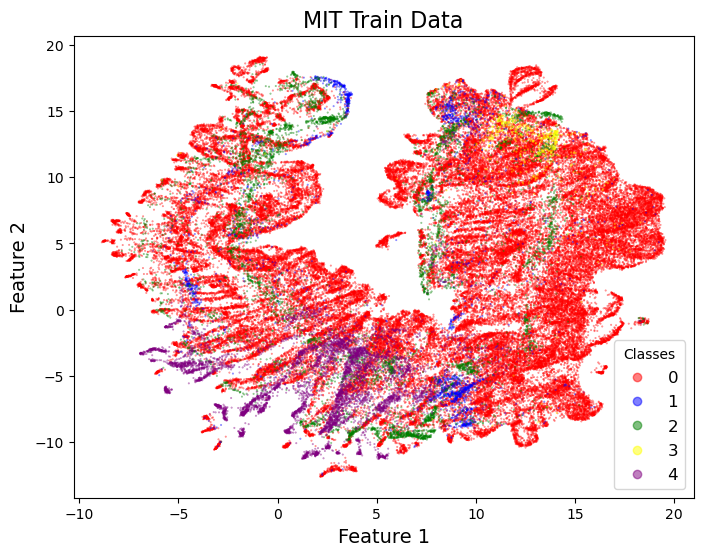

In [36]:
cmap = ListedColormap(['red', 'blue', 'green', 'yellow', 'purple'])

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(mit_train_reduced[:, 0], mit_train_reduced[:, 1], c=mit_train_labels, cmap=cmap, s=.2, alpha=0.5)
ax.set_title('MIT Train Data', fontsize=16)
ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)
handles, labels = sc.legend_elements()
ax.legend(handles, labels, title="Classes", fontsize=12)
plt.show()





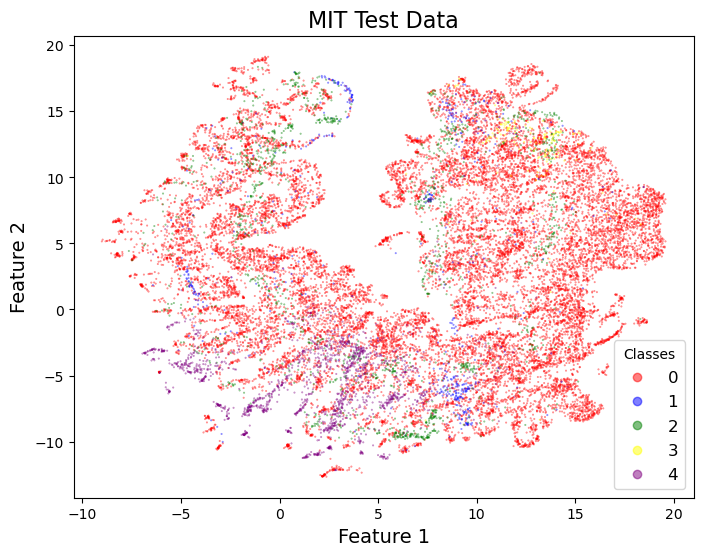

In [37]:
# plot mit test data    
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(mit_test_reduced[:, 0], mit_test_reduced[:, 1], c=mit_test_labels, cmap=cmap, s=.2, alpha=0.5)
ax.set_title('MIT Test Data', fontsize=16)
ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)
handles, labels = sc.legend_elements()
ax.legend(handles, labels, title="Classes", fontsize=12)
plt.show()


In [43]:
# make umap decomposition for ptb data
reducer = umap.UMAP(random_state=42, n_neighbors=10, min_dist=.3)
ptb_train_reduced = reducer.fit_transform(ptb_train_embedding)
ptb_test_reduced = reducer.transform(ptb_test_embedding)

c:\Users\MarvinLob\anaconda3\envs\ml4h\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


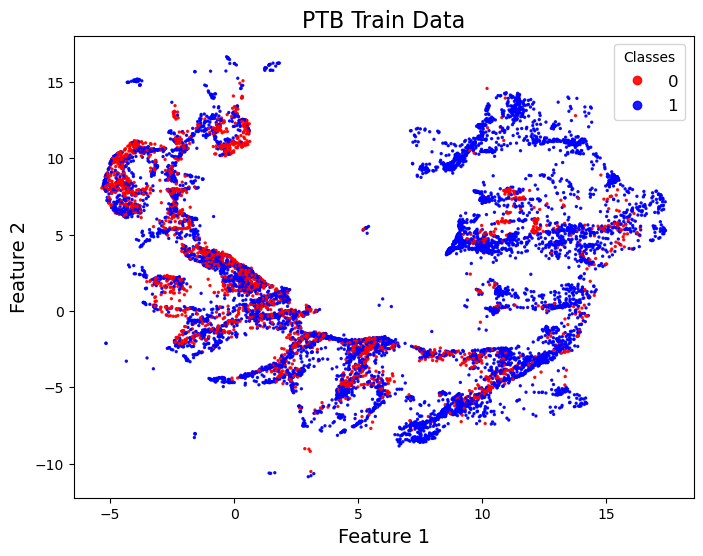

In [31]:
# plot ptb train data for the 2 classes
cmap = ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(ptb_train_reduced[:, 0], ptb_train_reduced[:, 1], c=ptb_train_labels, cmap=cmap, s=2, alpha=0.9)
ax.set_title('PTB Train Data', fontsize=16)
ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)
handles, labels = sc.legend_elements()
ax.legend(handles, labels, title="Classes", fontsize=12)
plt.show()


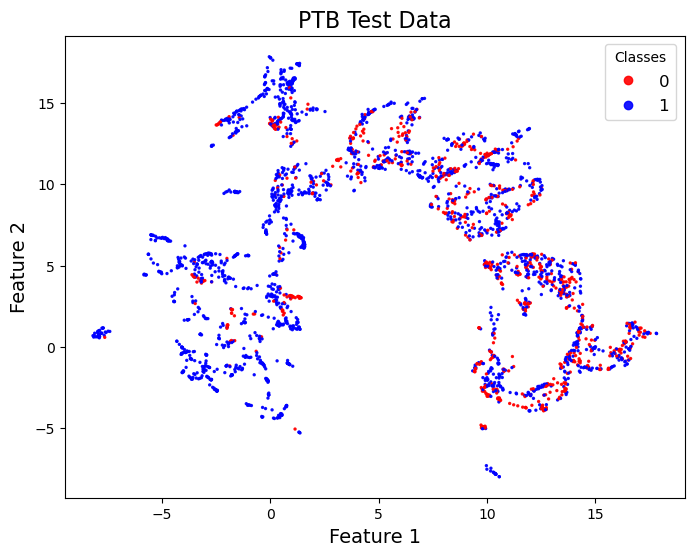

In [42]:
# plot ptb test data for the 2 classes
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(ptb_test_reduced[:, 0], ptb_test_reduced[:, 1], c=ptb_test_labels, cmap=cmap, s=2, alpha=0.9)
ax.set_title('PTB Test Data', fontsize=16)
ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)
handles, labels = sc.legend_elements()
ax.legend(handles, labels, title="Classes", fontsize=12)
plt.show()



## Asses if the datasets have the same distribution

TypeError: only length-1 arrays can be converted to Python scalars